In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [206]:
from glob import glob
import re


def load_df(path: str):
    m = re.search('.+out-(.+)-(.+)-(.+).csv', path)
    df = pd.read_csv(path)
    df['r'] = (df.x ** 2 + df.y ** 2) ** (1 / 2)
    df['cr'] = df['r'].cummax()

    mid_point = np.floor(df.shape[0] / 2)
    df['N'] = df.index + 1
    df['fd'] = np.log(df.N) / np.log(df.cr)

    df['seed'] = m[1]
    df['stick_probability'] = m[2]
    df['max_particles'] = m[3]

    return df


def read_data():
    paths = glob(f"../data/out-*-*-*.csv")
    return pd.concat([load_df(path) for path in paths])


def read_all(stick_probability, max_particles):
    paths = glob(f"../data/out-*-{stick_probability}-{max_particles}.csv")
    return [load_df(path) for path in paths]


def read_csv(seed, stick_probability, max_particles):
    return load_df(f"../data/out-{seed}-{stick_probability}-{max_particles}.csv")

In [207]:
fdf = read_data()
fdf

/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3

frame   x   y          r         cr    N        fd seed  \
0          0   0   0   0.000000   0.000000    1 -0.000000    5   
1        521   0  -1   1.000000   1.000000    2       inf    5   
2       1813   1   0   1.000000   1.000000    3       inf    5   
3       1964   0  -2   2.000000   2.000000    4  2.000000    5   
4       5551   2   0   2.000000   2.000000    5  2.321928    5   
..       ...  ..  ..        ...        ...  ...       ...  ...   
992  2232095  24  -1  24.020824  46.872167  993  1.793598    2   
993  2242034  11  22  24.596748  46.872167  994  1.793859    2   
994  2245442   7 -36  36.674242  46.872167  995  1.794121    2   
995  2245931 -18  -7  19.313208  46.872167  996  1.794382    2   
996  2252612  15 -18  23.430749  46.872167  997  1.794643    2   

    stick_probability max_particles  
0                0.25          1000  
1                0.25          1000  
2                0.25          1000  
3                0.25          1000  
4                0.25          1000  
..                ...           ...  
992              0.25         10000  
993              0.25         10000  
994              0.25         10000  
995              0.25         10000  
996              0.25         10000  

[4684146 rows x 10 columns]

In [197]:
np.log(fdf.cr) / np.log(fdf.cr)

/Users/joshuacoles/.local/share/virtualenvs/comp-b-cw1-data-6JKiQPfn/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          -inf
1      0.000000
2      0.000000
3      0.693147
4      0.693147
         ...   
992    3.847424
993    3.847424
994    3.847424
995    3.847424
996    3.847424
Name: cr, Length: 4684146, dtype: float64

In [266]:
pltd = fdf.where((fdf['fd'] != np.nan) & (fdf['fd'] != np.inf)).groupby(['stick_probability'])['fd'].mean()

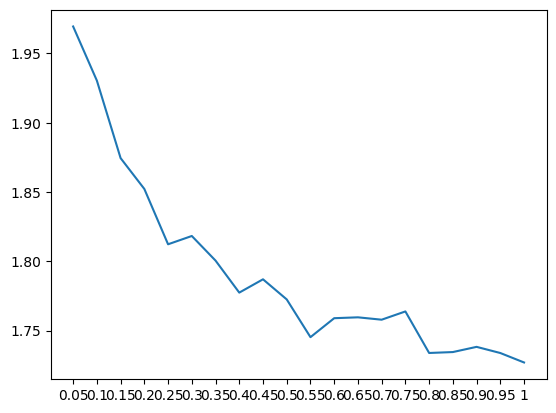

In [267]:
plt.plot(pltd)

In [265]:
fdf.where((fdf['fd'] != np.nan) & (fdf['fd'] != np.inf))

frame     x     y          r         cr      N        fd seed  \
0          0.0   0.0   0.0   0.000000   0.000000    1.0 -0.000000    5   
1          NaN   NaN   NaN        NaN        NaN    NaN       NaN  NaN   
2          NaN   NaN   NaN        NaN        NaN    NaN       NaN  NaN   
3       1964.0   0.0  -2.0   2.000000   2.000000    4.0  2.000000    5   
4       5551.0   2.0   0.0   2.000000   2.000000    5.0  2.321928    5   
..         ...   ...   ...        ...        ...    ...       ...  ...   
992  2232095.0  24.0  -1.0  24.020824  46.872167  993.0  1.793598    2   
993  2242034.0  11.0  22.0  24.596748  46.872167  994.0  1.793859    2   
994  2245442.0   7.0 -36.0  36.674242  46.872167  995.0  1.794121    2   
995  2245931.0 -18.0  -7.0  19.313208  46.872167  996.0  1.794382    2   
996  2252612.0  15.0 -18.0  23.430749  46.872167  997.0  1.794643    2   

    stick_probability max_particles  
0                0.25          1000  
1                 NaN           NaN  
2                 NaN           NaN  
3                0.25          1000  
4                0.25          1000  
..                ...           ...  
992              0.25         10000  
993              0.25         10000  
994              0.25         10000  
995              0.25         10000  
996              0.25         10000  

[4684146 rows x 10 columns]

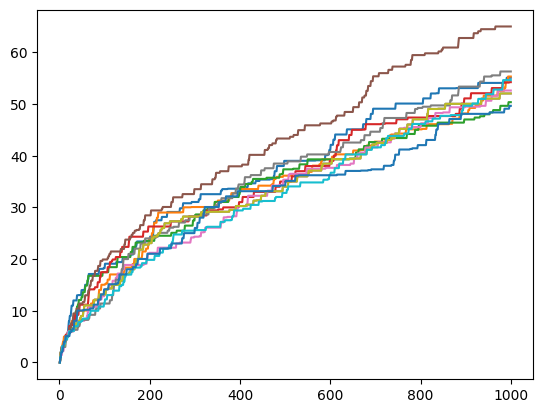

In [163]:
for df in read_all(1, 1000):
    plt.plot(df.index + 1, df.cr)

plt.show()

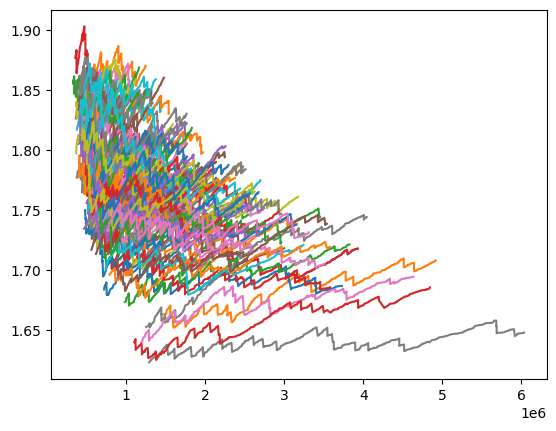

In [169]:
for df in read_all(0.5, 1000):
    plt.plot(df.frame, df.fd)

plt.show()

In [104]:
glob()

['../data/out-29-0.5-1000.csv',
 '../data/out-83-0.5-1000.csv',
 '../data/out-84-0.5-1000.csv',
 '../data/out-91-0.5-1000.csv',
 '../data/out-0-0.5-1000.csv',
 '../data/out-69-0.5-1000.csv',
 '../data/out-96-0.5-1000.csv',
 '../data/out-7-0.5-1000.csv',
 '../data/out-58-0.5-1000.csv',
 '../data/out-18-0.5-1000.csv',
 '../data/out-6-0.5-1000.csv',
 '../data/out-97-0.5-1000.csv',
 '../data/out-68-0.5-1000.csv',
 '../data/out-1-0.5-1000.csv',
 '../data/out-90-0.5-1000.csv',
 '../data/out-85-0.5-1000.csv',
 '../data/out-82-0.5-1000.csv',
 '../data/out-28-0.5-1000.csv',
 '../data/out-19-0.5-1000.csv',
 '../data/out-59-0.5-1000.csv',
 '../data/out-100-0.5-1000.csv',
 '../data/out-54-0.5-1000.csv',
 '../data/out-53-0.5-1000.csv',
 '../data/out-13-0.5-1000.csv',
 '../data/out-46-0.5-1000.csv',
 '../data/out-14-0.5-1000.csv',
 '../data/out-41-0.5-1000.csv',
 '../data/out-22-0.5-1000.csv',
 '../data/out-77-0.5-1000.csv',
 '../data/out-88-0.5-1000.csv',
 '../data/out-25-0.5-1000.csv',
 '../data/o

In [109]:
read_all(0.5, 1000)

frame   x   y       r      cr
0          0   0   0     0.0     0.0
1         51  -1   0     0.5     0.5
2        512  -1  -1     1.0     1.0
3       1818   0   1     0.5     1.0
4       1872   0   2     2.0     2.0
..       ...  ..  ..     ...     ...
995  2279814  14 -43  1022.5  1136.5
996  2281640  -7 -33   569.0  1136.5
997  2288145 -32   8   544.0  1136.5
998  2291975 -15  41   953.0  1136.5
999  2292846  -9  34   618.5  1136.5

[101000 rows x 5 columns]

In [171]:
df['seed'] = 1

In [185]:
df.shape[0]

(1000, 7)

In [189]:
np.floor(1/2)

0.0